#$\text{Transformasi Gambar menjadi Grayscale dan Kompresi Gambar}$
---
##$\text{Kel 1}$
###$\text{1. 10119056 - Okta Pratama}$ 
###$\text{2. 10120028 - Nathanael Sultanjaya}$ 
###$\text{3. 10120060 - William}$ 
###$\text{4. 10120092 - Nadya Winneke}$ 
###$\text{5. 10820022 - Jonathan Tanzi}$ 

##$\text{Connect to Google Drive}$

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Tubes Sikomat 2021

/content/gdrive/MyDrive/Tubes Sikomat 2021


##$\text{Import Library}$

In [ ]:
import numpy as np                  # Untuk memanipulasi gambar
import PIL                          # Untuk mengupload gambar
import io                           # Untuk menampilkan size suatu file gambar
from PIL import Image               # Untuk menampilkan gambar
from numpy import asarray           # Untuk mengubah input menjadi array

import os
import sys

##$\text{Progres Tubes (Transformasi Gambar menjadi Grayscale)}$

###$\text{18 September 2021}$

$\text{Import Images}$

---



In [ ]:
img_1 = PIL.Image.open("Sample_1.jpg")
img_2 = PIL.Image.open("Sample_2.jpg")
img_3 = PIL.Image.open("Sample_3.jpg")

$\text{Display Images}$

---



In [ ]:
print("Tampilan awal foto :")
display(img_1)

In [ ]:
print("Tampilan awal foto :")
display(img_2)

In [ ]:
print("Tampilan awal foto :")
display(img_3)

###$\text{20 September 2021}$

$\text{Convert Image into Numpy Array}$

---

In [ ]:
data_1 = np.array(Image.open('Sample_1.jpg').convert('L'))
print(type(data_1))
print(data_1)

In [ ]:
data_2 = np.array(Image.open('Sample_2.jpg').convert('L'))
print(type(data_2))
print(data_2)

In [ ]:
data_3 = np.array(Image.open('Sample_3.jpg').convert('L'))
print(type(data_3))
print(data_3)

$\text{Convert Image to Grayscale and Save Image as JPG}$


In [ ]:
gr_im_1 = Image.fromarray(data_1).save('Grayscale_sample1.jpg')
display(PIL.Image.open("Grayscale_sample1.jpg"))

In [ ]:
gr_im_2 = Image.fromarray(data_2).save('Grayscale_sample2.jpg')
display(PIL.Image.open("Grayscale_sample2.jpg"))

In [ ]:
gr_im_3 = Image.fromarray(data_3).save('Grayscale_sample3.jpg')
display(PIL.Image.open("Grayscale_sample3.jpg"))

##$\text{Progres Tubes (Kompresi Gambar dengan Metode Algoritma K-Means)}$

$\text{Algoritma K-Means merupakan salah satu teknik clustering berbasis centroid. Teknik ini mengelompokkan dataset menjadi k cluster yang berbeda. Setiap cluster dalam algoritma clustering k-means diwakili oleh titik pusatnya.}$

###$\text{24 September 2021}$

$\text{Find The Size of Images Before Compressing}$

In [ ]:
#Mengecek Ukuran File Asli
output = io.BytesIO()
img_1.save(output, format='png')
output.tell()

1478002

$\text{Define Function}$

In [ ]:
def initialize_K_centroids(X, K):
    """ Choose K points from X at random """
    m = len(X)
    return X[np.random.choice(m, K, replace=False), :]

def find_closest_centroids(X, centroids):
    m = len(X)
    c = np.zeros(m)
    for i in range(m):
        # Find distances
        distances = np.linalg.norm(X[i] - centroids, axis=1)

        # Assign closest cluster to c[i]
        c[i] = np.argmin(distances)

    return c

def compute_means(X, idx, K):
    _, n = X.shape
    centroids = np.zeros((K, n))
    for k in range(K):
        examples = X[np.where(idx == k)]
        mean = [np.mean(column) for column in examples.T]
        centroids[k] = mean
    return centroids

def find_k_means(X, K, max_iters=10):
    centroids = initialize_K_centroids(X, K)
    previous_centroids = centroids
    for _ in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_means(X, idx, K)
        if (centroids == previous_centroids).all():
            # Berarti centroid sudah tidak bergerak lagi
            return centroids
        else:
            previous_centroids = centroids

    return centroids, idx

###$\text{26 September 2021}$

In [ ]:
try:
    image_path = sys.argv[1]
    assert os.path.isfile(image_path)
except (IndexError, AssertionError):
    print('Please specify an image')

def load_image(path):
    """ Load image from path. Return a numpy array """
    image = Image.open("Sample_1.jpg")
    return np.asarray(image) / 255

image = load_image("Sample_1.jpg")
w, h, d = image.shape
print('Image found with width: {}, height: {}, depth: {}'.format(w, h, d))

X = image.reshape((w * h, d))
K = 20 # banyaknya warna yang ingin ditampilkan pada hasil kompresi gambar
       # semakin besar nilai K maka semakin kecil kompresi yang dilakukan

colors, _ = find_k_means(X, K, max_iters=20)

idx = find_closest_centroids(X, colors)

idx = np.array(idx, dtype=np.uint8)
X_reconstructed = np.array(colors[idx, :] * 255, dtype=np.uint8).reshape((w, h, d))
compressed_image = Image.fromarray(X_reconstructed)

compressed_image.save('compressed_sample_1.png')


Please specify an image
Image found with width: 960, height: 1280, depth: 3


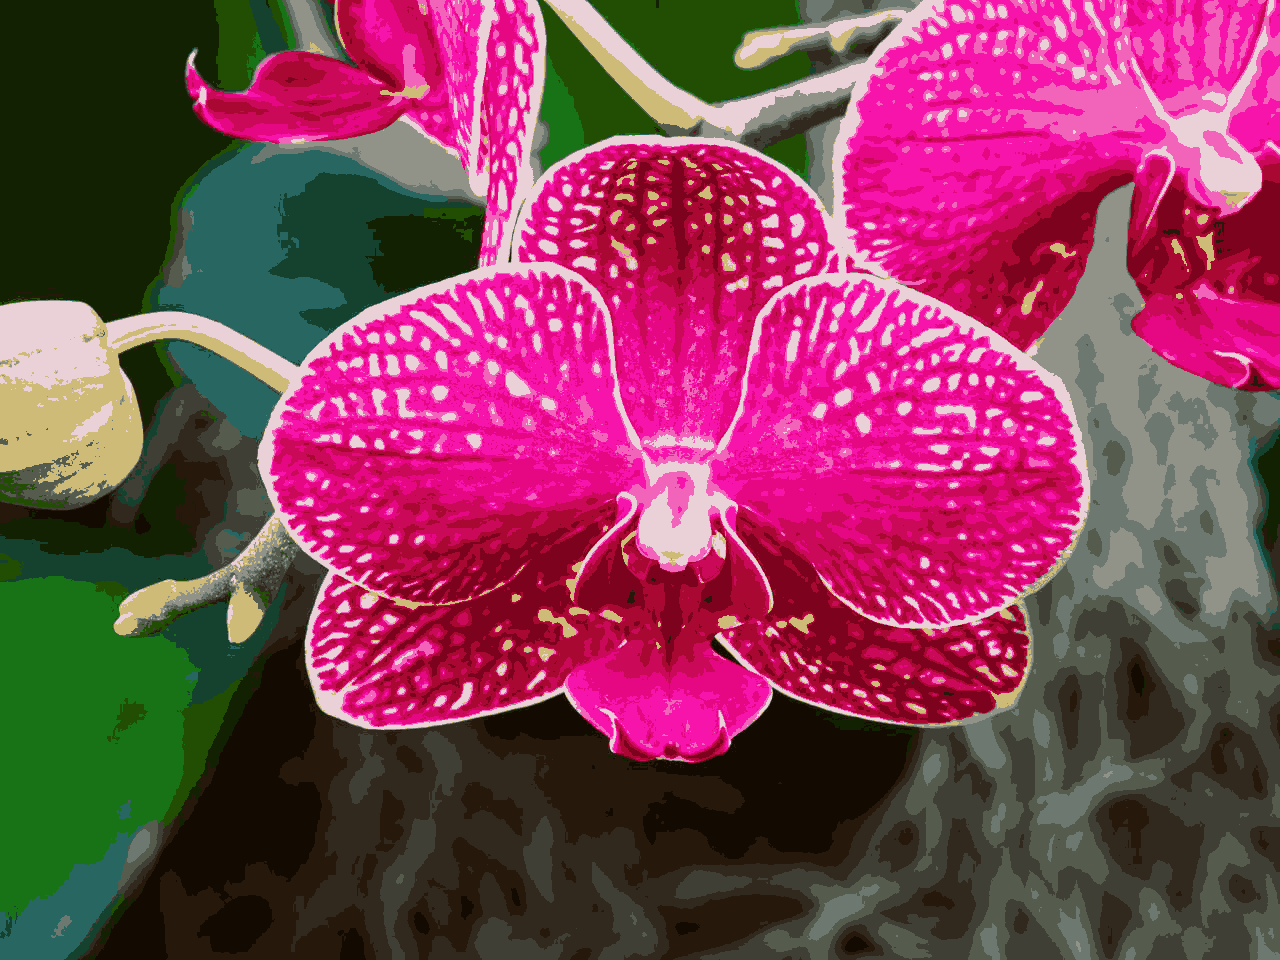

In [ ]:
display(compressed_image)

$\text{Find The Size of Images After Compressing}$

In [ ]:
#Ukuran File setelah proses Compressing
output = io.BytesIO()
compressed_image.save(output, format='png')
output.tell()

222591

Size gambar berubah dari 1478002 bytes menjadi 222591 bytes (berkurang 84,94% dari size semula).